In [87]:
from copy import copy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [88]:
df_2d = pd.read_csv('./data/data_2d.csv')
df_mnist = pd.read_csv('./data/mnist.csv')

In [89]:
class KMeansFactory:

    def __init__(self, X) -> None:
        scaler = StandardScaler()
        standardized_data = scaler.fit_transform(X)
        self.X = pd.DataFrame(standardized_data, columns = X.columns)

    def get_inertia(self, max_k = 5) -> list:
        inertia = []

        for k in range(1, max_k + 1):
            kmeans = KMeans(n_clusters = k, n_init = 'auto')
            kmeans.fit(self.X)
            inertia.append(kmeans.inertia_)
        
        return inertia

    def plot_inertia(self, inertia) -> None:
        sns.set_style('darkgrid')
        plt.figure(figsize = (12, 12))

        plt.plot(range(1, len(inertia) + 1), inertia)

        plt.xlabel('Number of clusters (K)')
        plt.ylabel('Inertia')
        plt.title('Elbow Method')
        
        plt.show()

    def fit(self, n_clusters) -> KMeans:
        kmeans = KMeans(n_clusters = n_clusters, n_init = 'auto')
        kmeans.fit(self.X)
        
        return kmeans
    
    def visualize_clusters(self, model):
        data = copy(self.X)

        if data.shape[1] > 2:
            pca = PCA(n_components=2)
            reduced_data = pd.DataFrame(pca.fit_transform(data))
        else:
            reduced_data = data

        labels = model.predict(data)

        n_clusters = model.n_clusters
        
        clusters = []
        for i in range(n_clusters):
            clusters.append(reduced_data[labels == i])
        
        for i in range(n_clusters):
            plt.scatter(clusters[i][0], clusters[i][1], label='Cluster {}'.format(i))
        
        centroids = pca.transform(model.cluster_centers_) if data.shape[1] > 2 else model.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='red', label='Centroids')
        
        plt.legend()
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        
        plt.show()

2D k-means

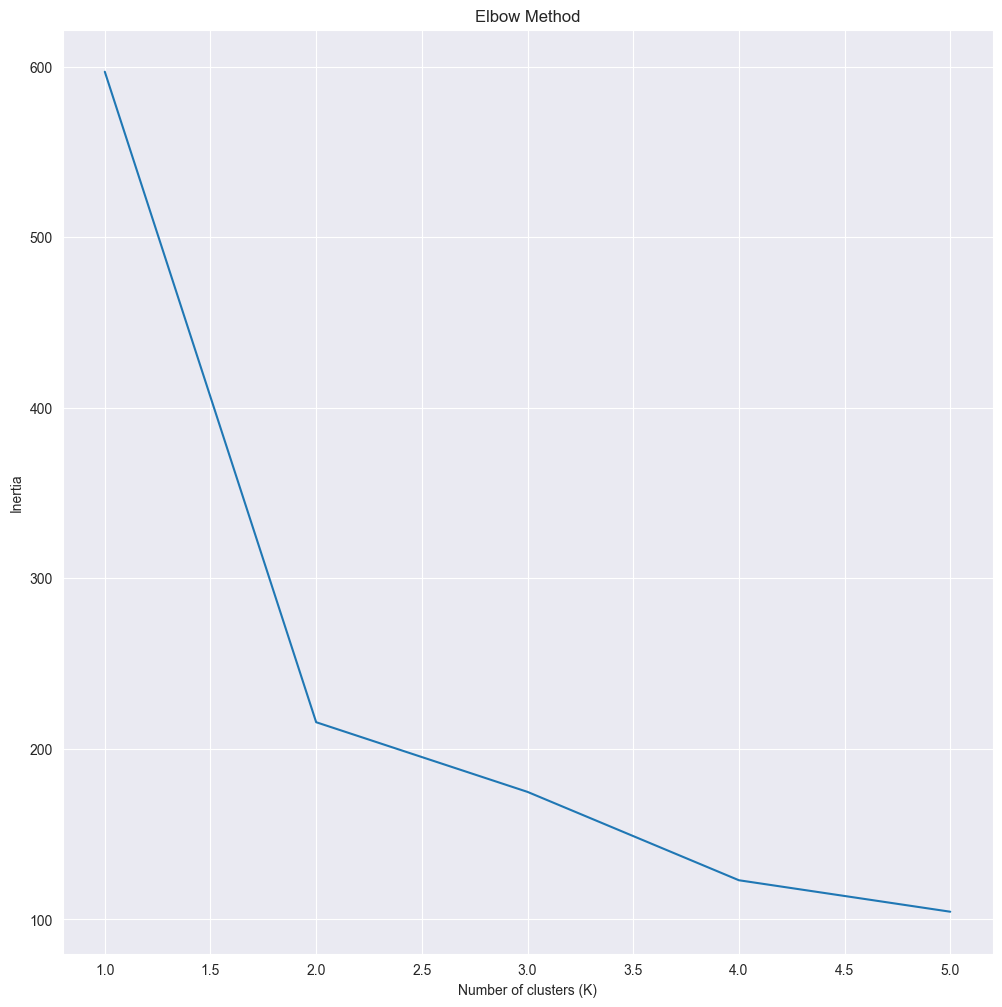

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


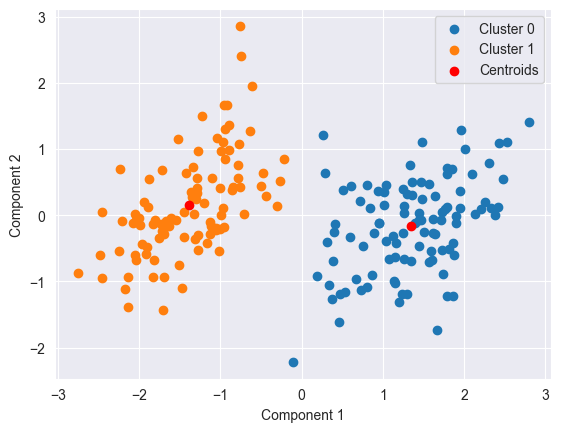

In [90]:
factory_2d = KMeansFactory(df_2d)
inertia_2d = factory_2d.get_inertia()
factory_2d.plot_inertia(inertia_2d)
kmeans_2d = factory_2d.fit(2)
factory_2d.visualize_clusters(kmeans_2d)

Mnist k-means

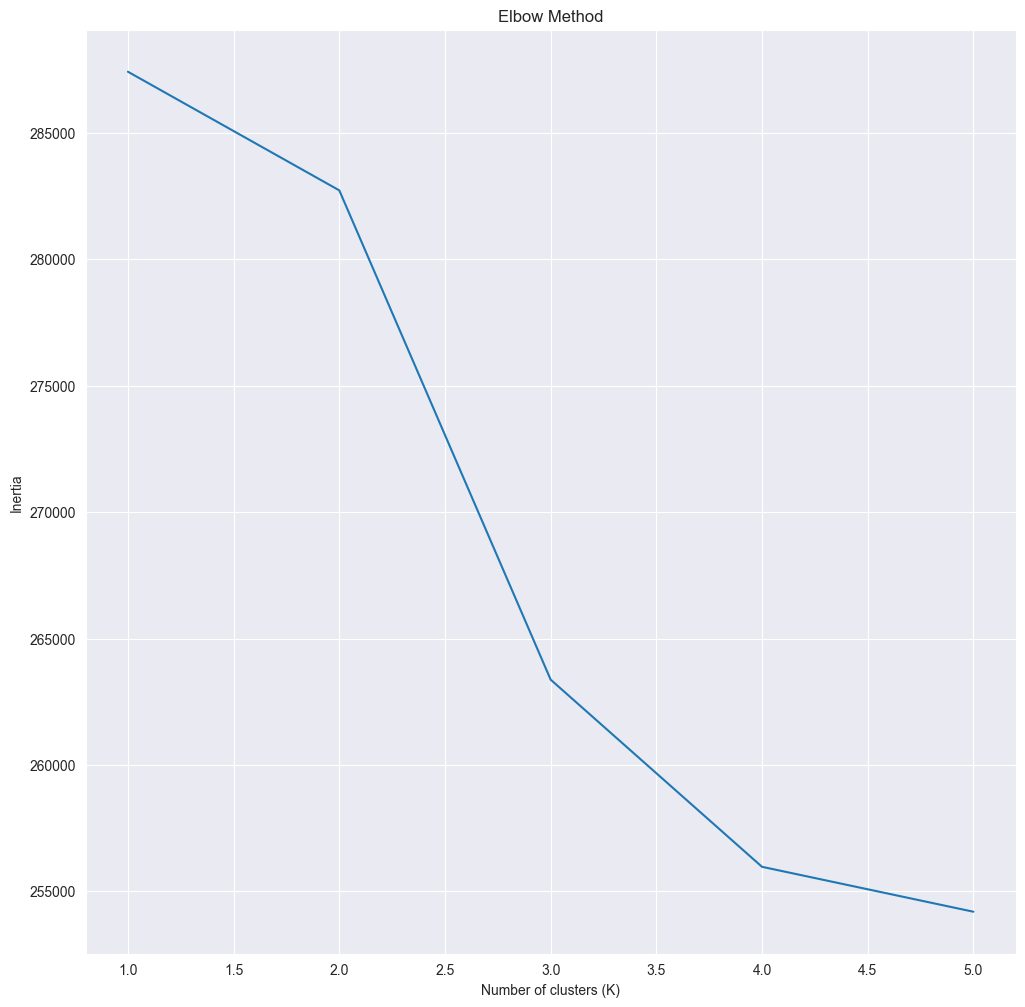

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


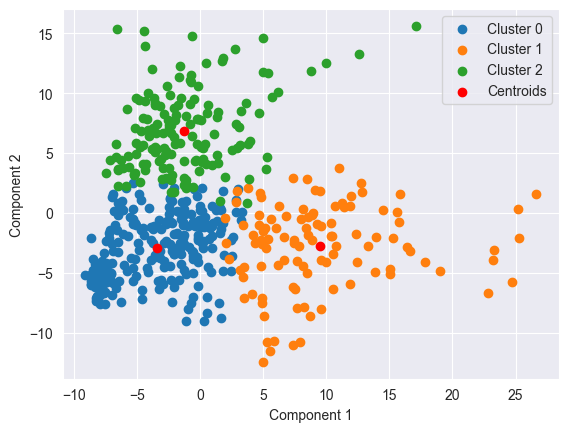

In [92]:
factory_mnist = KMeansFactory(df_mnist)
inertia_mnist = factory_mnist.get_inertia()
factory_mnist.plot_inertia(inertia_mnist)
kmeans_mnist = factory_mnist.fit(3)
factory_mnist.visualize_clusters(kmeans_mnist)